**Introduction**


This notebook was created for analysis and prediction making of the Default of credit card clients Data Set from UCI Machine Learning Library.

**Attribute Information**
Below there are the description of the attributes that will be used in our model for better understanding of the data:

LIMIT_BAL: Amount of the given credit (NT dollar). It includes both the individual consumer credit and his/her family (supplementary) credit.

SEX: Gender (1 = male; 2 = female).

EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
AGE: Age (year).

PAY_1: the repayment status in September, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

PAY_2: the repayment status in August, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

PAY_3: the repayment status in July, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

PAY_4: the repayment status in June, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

PAY_5: the repayment status in May, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

PAY_6: the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

BILL_AMT1: Amount of bill statement (NT dollar). Amount of bill statement in September, 2005.

BILL_AMT2: Amount of bill statement (NT dollar). Amount of bill statement in August, 2005.

BILL_AMT3: Amount of bill statement (NT dollar). Amount of bill statement in July, 2005.

BILL_AMT4: Amount of bill statement (NT dollar). Amount of bill statement in June, 2005.

BILL_AMT5: Amount of bill statement (NT dollar). Amount of bill statement in May, 2005.

BILL_AMT6: Amount of bill statement (NT dollar). Amount of bill statement in April, 2005.

PAY_AMT1: Amount of previous payment (NT dollar). Amount paid in September, 2005.
PAY_AMT2: Amount of previous payment (NT dollar). Amount paid in August, 2005.

PAY_AMT3: Amount of previous payment (NT dollar). Amount paid in July, 2005.

PAY_AMT4: Amount of previous payment (NT dollar). Amount paid in June, 2005.
PAY_AMT5: Amount of previous payment (NT dollar). Amount paid in May, 2005.
PAY_AMT6: Amount of previous payment (NT dollar). Amount paid in June, 2005.

dpnm: Default payment next month.(Yes = 1, No = 0)

**Models¶**

I  create 2 models in order to make predictions and compare them with the original paper. These models are:

Logistic Regression
Decision tree


# Goal¶
Using the models we created, we will try to predict the class value of dpnm column with better scores (accuracy and f1)

### **import libarires**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#lm models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#matrecis
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, precision_score, recall_score

**load data**

In [8]:
df=pd.read_csv("/content/default of credit card clients.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## **EDA **

In [15]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
df.info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

None

In [17]:
df.describe
display(df.describe())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
print(df["MARRIAGE"].value_counts())
print(df["EDUCATION"].value_counts())

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


In [15]:
df["MARRIAGE"]=df["MARRIAGE"].replace(0,3)
df["EDUCATION"]=df["EDUCATION"].replace([0,5,6],4)
print (df["MARRIAGE"].value_counts())
print (df["EDUCATION"].value_counts())

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64
EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64


In [16]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_1,0
PAY_2,0
PAY_3,0
PAY_4,0


In [23]:
print(df.duplicated().sum())

0


In [3]:
df.drop_duplicates(inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


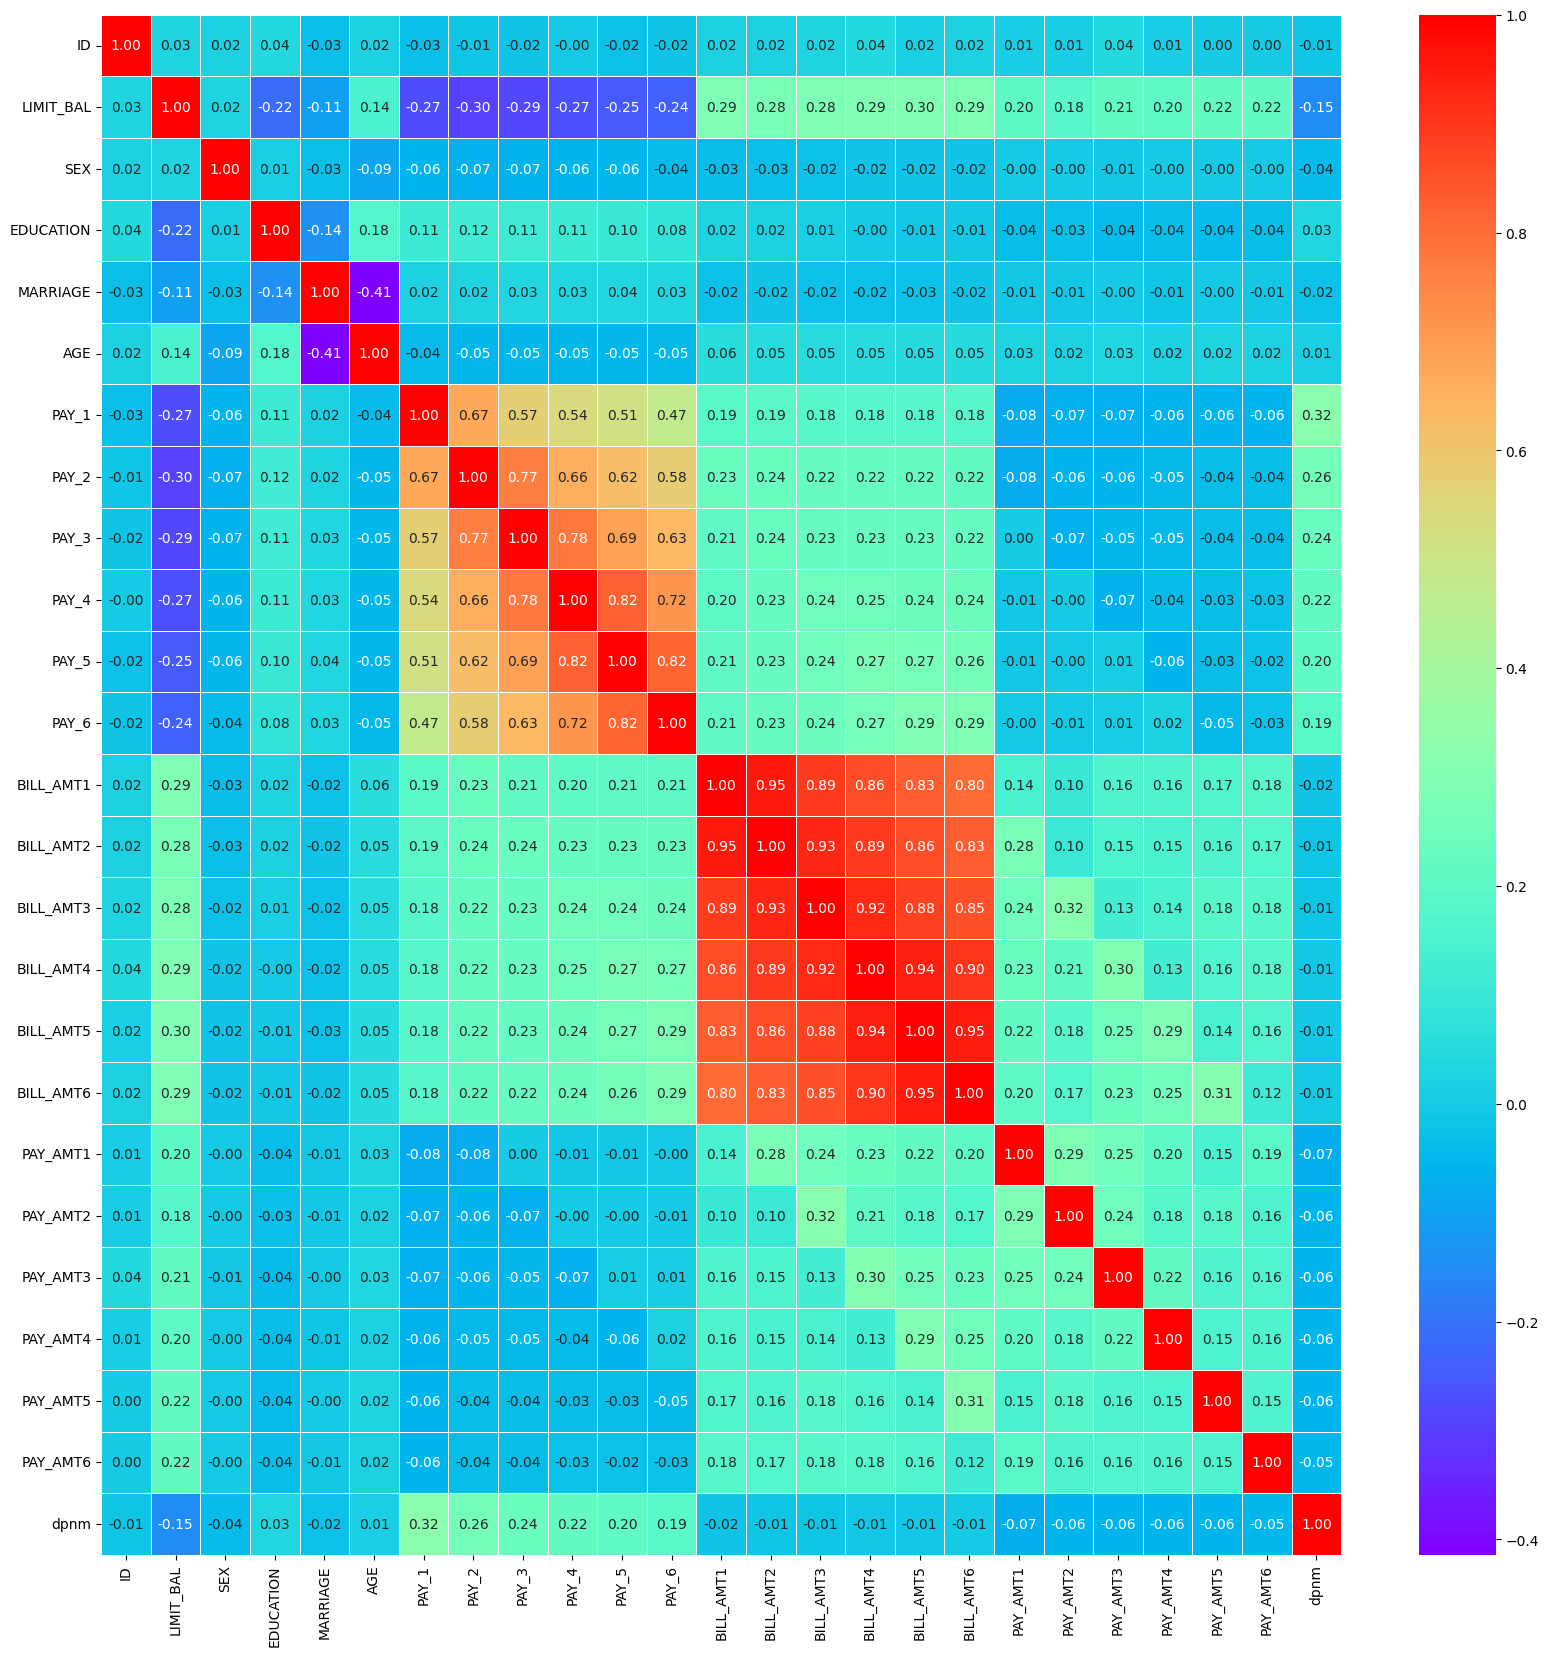

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='rainbow',linewidth=0.5,fmt='.2f')
plt.show()

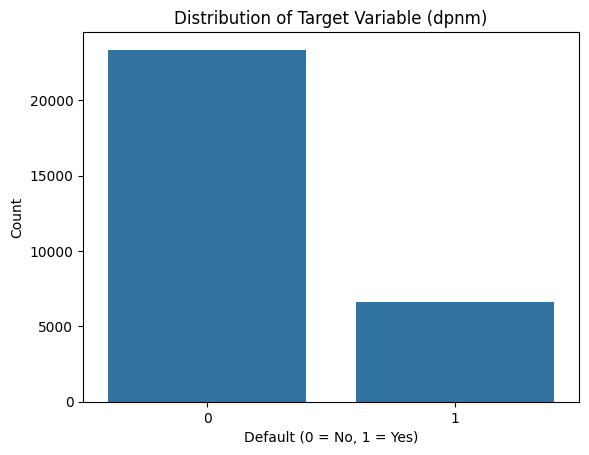

In [27]:
sns.countplot(x='dpnm', data=df)
plt.title('Distribution of Target Variable (dpnm)')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

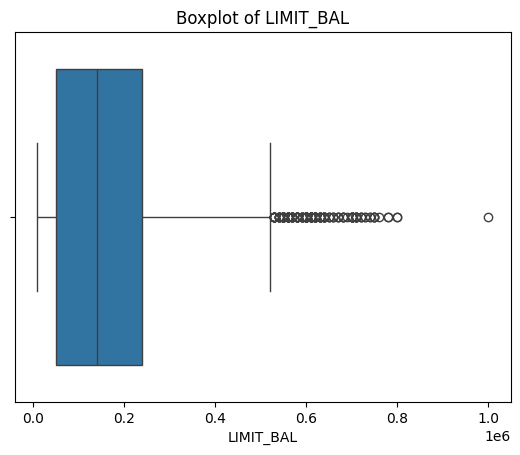

In [28]:
sns.boxplot(x=df['LIMIT_BAL'])
plt.title('Boxplot of LIMIT_BAL')
plt.xlabel('LIMIT_BAL')
plt.show()

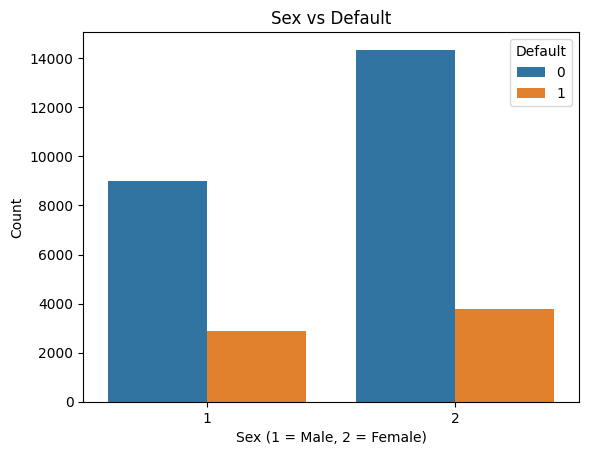

In [30]:
sns.countplot(x='SEX', hue='dpnm', data=df)
plt.title('Sex vs Default')
plt.xlabel('Sex (1 = Male, 2 = Female)')
plt.ylabel('Count')
plt.legend(title='Default')
plt.show()

**preprocessing**

In this part we prepare our data for our models. This means that we choose the columns that will be our independed variables and which column the class that we want to predict. Once we are done with that, we split our data into train and test sets and perfom a standardization upon them.

dbmn="default payment next month"



In [9]:
X= df[df.columns[:-1]]
y= df['dpnm']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)

In [11]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

 Modeling

In this section we build and try 2 models:

Logistic Regression &

Decision tree

In [17]:
logreg=LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1)
print(logreg.fit(X_train,y_train))

LogisticRegression(multi_class='auto', n_jobs=-1, random_state=25)


In [19]:
log_pred=logreg.predict(X_test)
logreg_cv=cross_val_score(logreg, X_train, y_train, cv=10).mean()

In [23]:
print('Accuracy: %.3f' % logreg.score(X_test, y_test))
print('Cross-validation accuracy: %0.3f' % logreg_cv)
print('Precision: %.3f' % precision_score(y_test, log_pred))
print('Recall: %.3f' % recall_score(y_test, log_pred))
print('F1 score: %.3f' % f1_score(y_test, log_pred))

Accuracy: 0.776
Cross-validation accuracy: 0.780
Precision: 0.000
Recall: 0.000
F1 score: 0.000


Dession tree

In [25]:
tr = tree.DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=25)
tr.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=25)

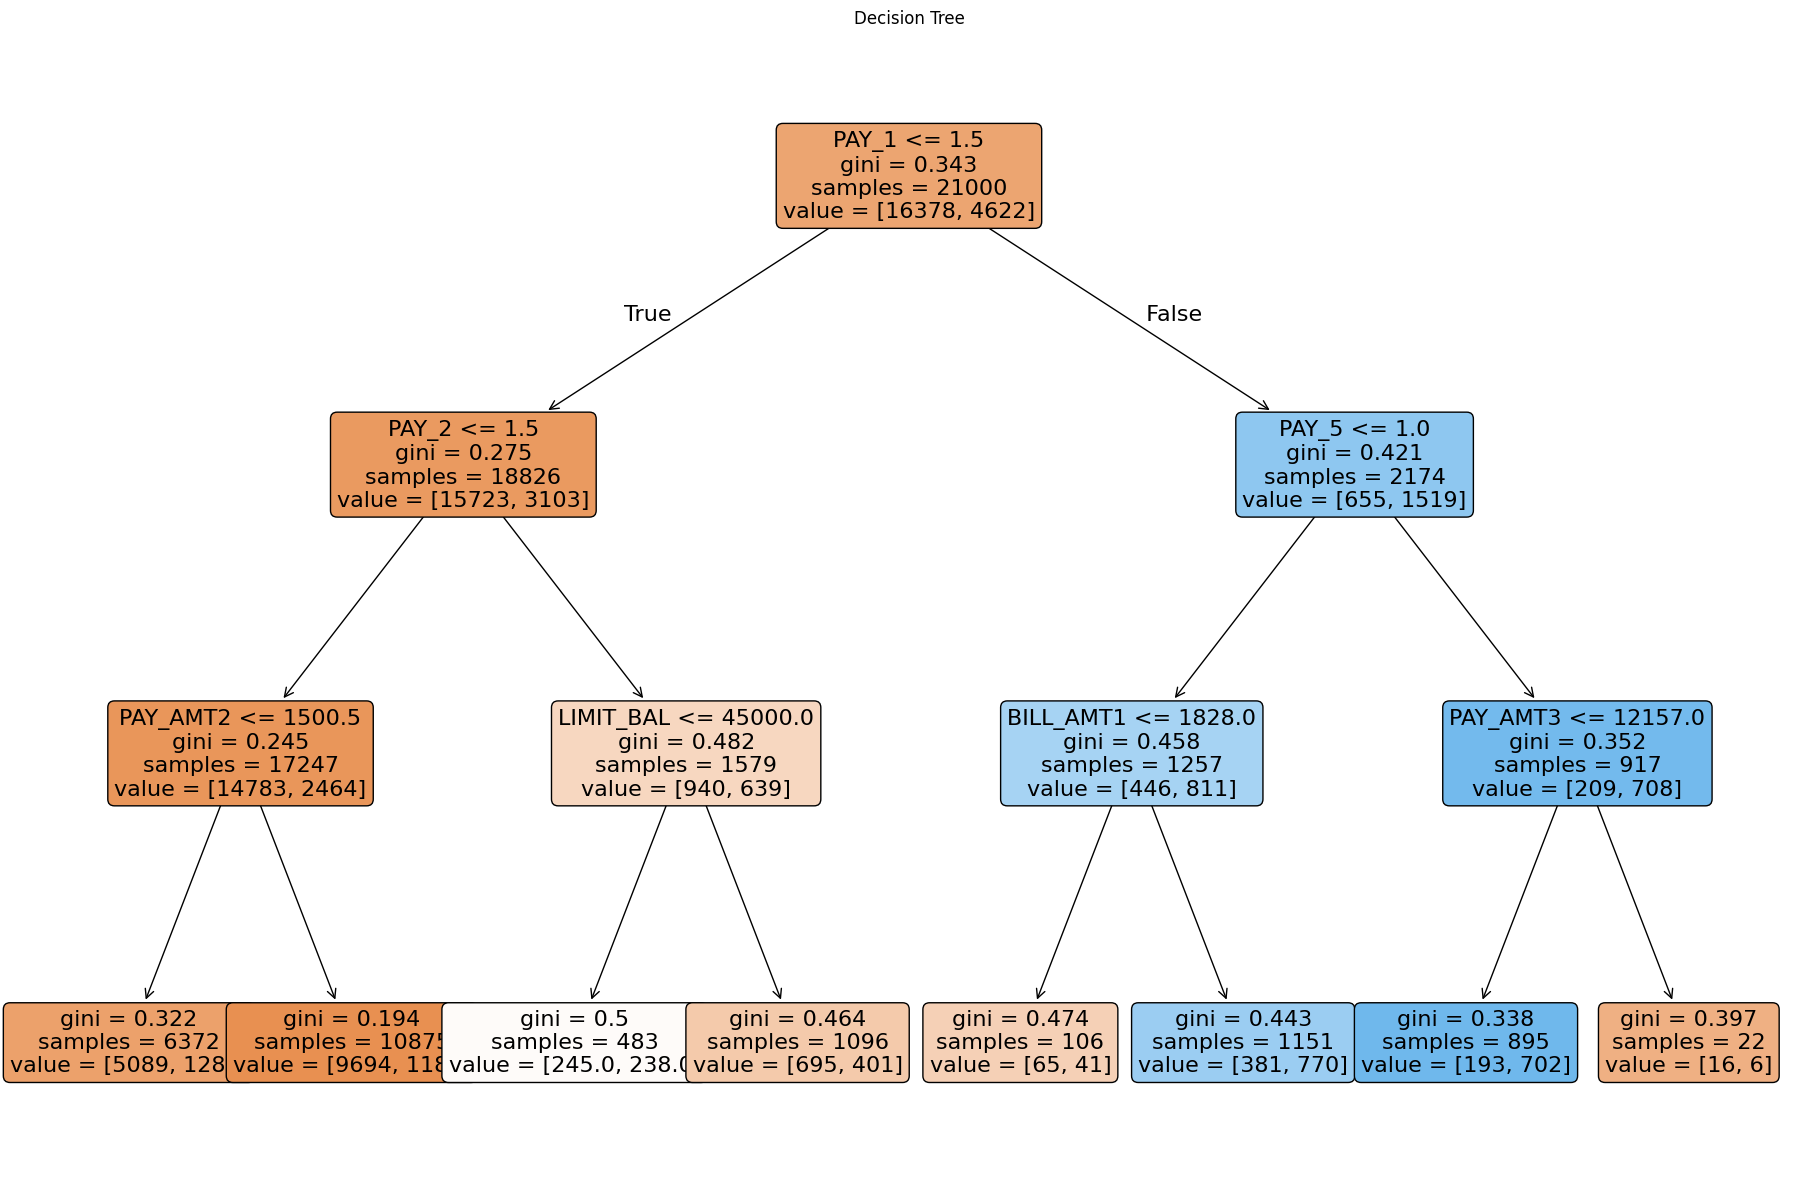

In [26]:
fig=plt.figure(figsize=(23,15))
tree.plot_tree(tr.fit(X_train, y_train),feature_names=X.columns,filled=True,rounded=True,fontsize=16);
plt.title('Decision Tree');